# Esercitazione 8

## 8.2

Il grafico riportato qui sotto mostra il processo di data blocking dell'energia potenziale ottenuta campionando la  $\Psi_T^{\sigma,\mu}$ con il miglior set di parametri ottenuto.

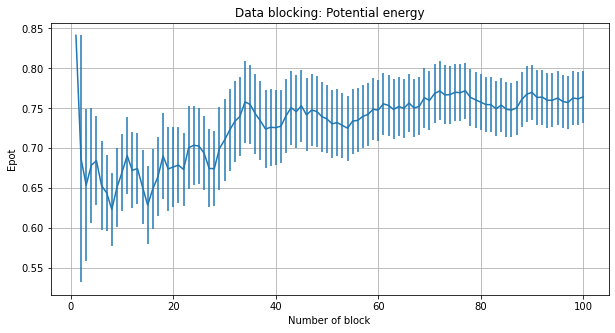

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))

i, error, data = np.loadtxt('8.1/Risultati.dat', usecols=(0,1,2),delimiter='	', unpack='true')

plt.errorbar(i,data, yerr=error)
plt.title("Data blocking: Potential energy")
plt.xlabel("Number of block")
plt.ylabel("Epot")
plt.grid()
plt.show()


Text(0.5, 0, 'x')

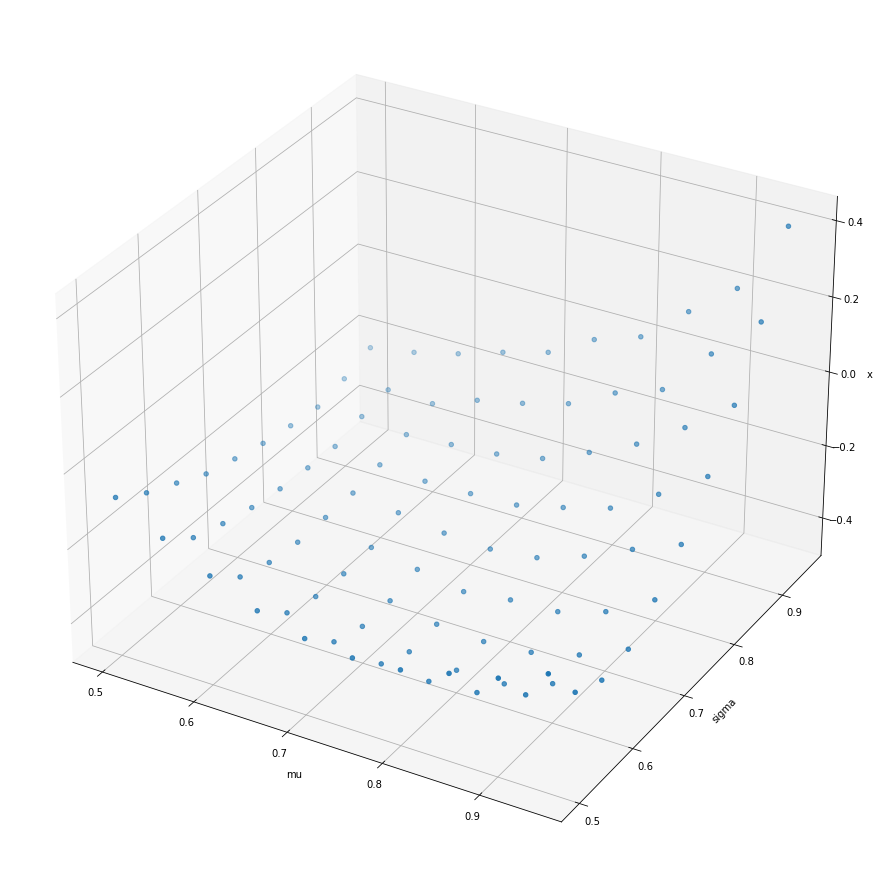

In [2]:
mu, sigma, x = np.loadtxt('8.2/Energie_perMin.dat', usecols=(0,1,2),delimiter='	', unpack='true')


fig = plt.figure(figsize=(19, 16))
# Create 3D container
ax=plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(mu, sigma, x)
# Give labels
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('x')

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176107
2nd excited state energy:  1.9717331343930204
optimized parameters [mu,sigma,c] =
[0.73857356 0.51405166 0.3942103 ]
parameters uncertainty =
[0.0011756  0.00133421 0.00098857]


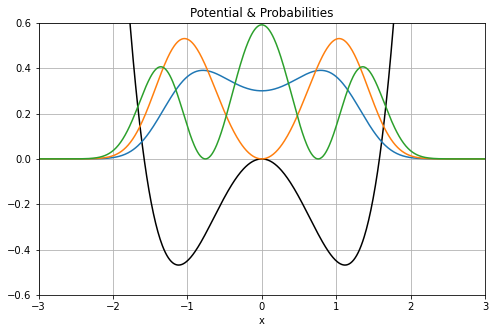

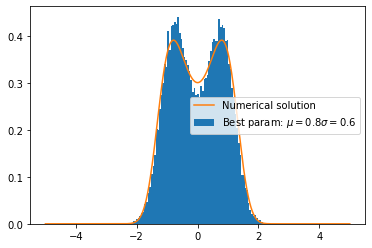

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def f(x,mu,sigma,c):
    return c*(np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))



hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])


p_opt, p_cov = curve_fit(f, x, (psi[0])**2)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])

print("optimized parameters [mu,sigma,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))



# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()


y=np.loadtxt("8.2/Posizioni.dat")

plt.hist(y, bins=100, density=True, label=r"Best param: $\mu=0.8 \sigma=0.6$")
plt.plot(x,(psi[0])**2, label="Numerical solution")
plt.legend()



# 8.3

### PIGS

Di seguito mostriamo i risultati dell'algoritmo PIGS: *path-integral ground-state* Monte Carlo, partendo dalle funzioni d'onda non normalizzate:
$$
\psi_1(x)=1,
\hspace{1cm}
\psi_2(x)=\exp\biggl(-\frac{(x-\mu)^2}{2\sigma^2}\biggr)+\exp\biggl(-\frac{(x+\mu)^2}{2\sigma^2}\biggr),
$$

il programma calcola la funzione di densità di probabilità del ground state.
Entrambi i risultatis sono molto vicini alla soluzione numerica esatta.


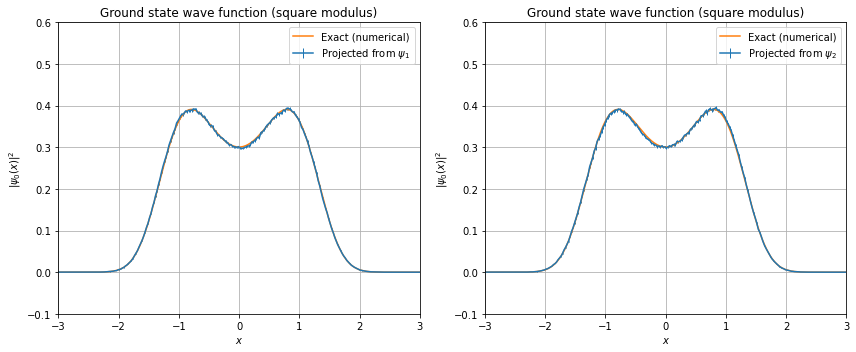

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

# Histogram of the square modulus of the wave function.
x_bins, h_avg, h_err = np.loadtxt("8.3/Psi1/probability.dat", unpack = True)
axes[0].errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = r"Projected from $\psi_1$"
)

x_bins, h_avg, h_err = np.loadtxt("8.3/Psi2/probability.dat", unpack = True)
axes[1].errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = r"Projected from $\psi_2$"
)

for ax in axes:
    ax.set_title("Ground state wave function (square modulus)")
    ax.set_ylabel(r"$|\psi_0(x)|^2$")
    ax.set_xlabel(r"$x$")
    ax.plot(x, (psi[0])**2, label = "Exact (numerical)")
    ax.set_xlim((-3, 3))
    ax.set_ylim((-0.1, 0.6))
    ax.legend()
    ax.grid(True)

fig.tight_layout()
plt.show()

### PIMC

Mostriamo infine i risultati del PIMC: *path-integral* Monte Carlo algorithm,  simulato per un sistema a temperatura positiva.
I grafici mostrano le funzioni d'onda per un sistema a temperatura crescente (T=1, T=2, T=3, T=7).
Al crescere della temperatura, la funzione d'onda campionata diventa più ampia, infatti gi stati eccitati pesano maggiormente nell'ensamble statistico.

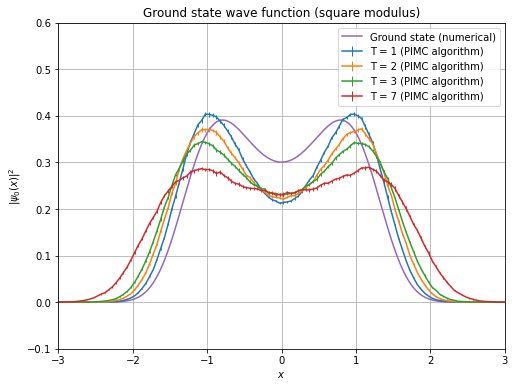

In [6]:

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

# Histogram of the square modulus of the wave function.

x_bins, h_avg, h_err = np.loadtxt("8.3/Pimc/T1/probability.dat", unpack = True)
axes.errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = "T = 1 (PIMC algorithm)"
)

x_bins, h_avg, h_err = np.loadtxt("8.3/Pimc/T2/probability.dat", unpack = True)
axes.errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = "T = 2 (PIMC algorithm)"
)

x_bins, h_avg, h_err = np.loadtxt("8.3/Pimc/T3/probability.dat", unpack = True)
axes.errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = "T = 3 (PIMC algorithm)"
)

x_bins, h_avg, h_err = np.loadtxt("8.3/Pimc/T7/probability.dat", unpack = True)
axes.errorbar(
    x_bins,
    h_avg,
    yerr = h_err,
    elinewidth = 1,
    label = "T = 7 (PIMC algorithm)"
)
# (The results are the same regardless of the trial wavefunction.)

axes.set_title("Ground state wave function (square modulus)")
axes.set_ylabel(r"$|\psi_0(x)|^2$")
axes.set_xlabel(r"$x$")
axes.grid(True)
axes.plot(x, (psi[0])**2, label = "Ground state (numerical)")
axes.set_xlim((-3, 3))
axes.set_ylim((-0.1, 0.6))
axes.legend()
axes.grid(True)

plt.show()